# RANZCR CLiP - Catheter and Line Position Challenge - Exploratory Data Analysis

Quick Exploratory Data Analysis for [RANZCR CLiP - Catheter and Line Position Challenge](https://www.kaggle.com/c/ranzcr-clip-catheter-line-classification) challenge    

In this competition, you’ll detect the presence and position of catheters and lines on chest x-rays. Use machine learning to train and test your model on 40,000 images to categorize a tube that is poorly placed.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/23870/logos/header.png?t=2020-12-01-04-28-05)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#6E848D; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Overview](#1)
* [Annotations](#2)
    
    
    
* [ETT - Abnormal](#4)
* [ETT - Borderline](#5)
* [ETT - Normal](#6)
* [NGT - Abnormal](#7)
* [NGT - Borderline](#8)
* [NGT - Incompletely Imaged](#9)
* [NGT - Normal](#10)
* [CVC - Abnormal](#11)
* [CVC - Borderline](#12)
* [CVC - Normal](#13)
* [Swan Ganz Catheter Present](#14)
    

* [Venn Diagrams](#50)
    
    
* [Submission](#100)

In [ ]:
!pip install -q -U pip
!pip install -q -U seaborn

<a id="1"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>Overview<center><h2>

In [2]:
import os
import ast
import random

import numpy as np
import pandas as pd
# import cv2
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import seaborn as sns

In [5]:
BASE_DIR = "../data/"
print(os.listdir(BASE_DIR))

['.ipynb_checkpoints', 'copy_your_kaggle_data_here.txt', 'sample_submission.csv', 'test', 'test_tfrecords', 'train', 'train.csv', 'train_annotations.csv', 'train_tfrecords']


**train.csv** contains image IDs, binary labels, and patient IDs.

In [3]:
df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"), index_col=0)
df_train.head()

ETT - Abnormal  \
StudyInstanceUID                                                     
1.2.826.0.1.3680043.8.498.266976289532732281893...               0   
1.2.826.0.1.3680043.8.498.463028915973987587598...               0   
1.2.826.0.1.3680043.8.498.238192607197484948589...               0   
1.2.826.0.1.3680043.8.498.682866432023232128012...               0   
1.2.826.0.1.3680043.8.498.100502030092259382591...               0   

                                                    ETT - Borderline  \
StudyInstanceUID                                                       
1.2.826.0.1.3680043.8.498.266976289532732281893...                 0   
1.2.826.0.1.3680043.8.498.463028915973987587598...                 0   
1.2.826.0.1.3680043.8.498.238192607197484948589...                 0   
1.2.826.0.1.3680043.8.498.682866432023232128012...                 0   
1.2.826.0.1.3680043.8.498.100502030092259382591...                 0   

                                                    ETT - Normal  \
StudyInstanceUID                                                   
1.2.826.0.1.3680043.8.498.266976289532732281893...             0   
1.2.826.0.1.3680043.8.498.463028915973987587598...             1   
1.2.826.0.1.3680043.8.498.238192607197484948589...             0   
1.2.826.0.1.3680043.8.498.682866432023232128012...             0   
1.2.826.0.1.3680043.8.498.100502030092259382591...             0   

                                                    NGT - Abnormal  \
StudyInstanceUID                                                     
1.2.826.0.1.3680043.8.498.266976289532732281893...               0   
1.2.826.0.1.3680043.8.498.463028915973987587598...               0   
1.2.826.0.1.3680043.8.498.238192607197484948589...               0   
1.2.826.0.1.3680043.8.498.682866432023232128012...               0   
1.2.826.0.1.3680043.8.498.100502030092259382591...               0   

                                                    NGT - Borderline  \
StudyInstanceUID                                                       
1.2.826.0.1.3680043.8.498.266976289532732281893...                 0   
1.2.826.0.1.3680043.8.498.463028915973987587598...                 0   
1.2.826.0.1.3680043.8.498.238192607197484948589...                 0   
1.2.826.0.1.3680043.8.498.682866432023232128012...                 0   
1.2.826.0.1.3680043.8.498.100502030092259382591...                 0   

                                                    NGT - Incompletely Imaged  \
StudyInstanceUID                                                                
1.2.826.0.1.3680043.8.498.266976289532732281893...                          0   
1.2.826.0.1.3680043.8.498.463028915973987587598...                          1   
1.2.826.0.1.3680043.8.498.238192607197484948589...                          0   
1.2.826.0.1.3680043.8.498.682866432023232128012...                          0   
1.2.826.0.1.3680043.8.498.100502030092259382591...                          0   

                                                    NGT - Normal  \
StudyInstanceUID                                                   
1.2.826.0.1.3680043.8.498.266976289532732281893...             1   
1.2.826.0.1.3680043.8.498.463028915973987587598...             0   
1.2.826.0.1.3680043.8.498.238192607197484948589...             0   
1.2.826.0.1.3680043.8.498.682866432023232128012...             0   
1.2.826.0.1.3680043.8.498.100502030092259382591...             0   

                                                    CVC - Abnormal  \
StudyInstanceUID                                                     
1.2.826.0.1.3680043.8.498.266976289532732281893...               0   
1.2.826.0.1.3680043.8.498.463028915973987587598...               0   
1.2.826.0.1.3680043.8.498.238192607197484948589...               0   
1.2.826.0.1.3680043.8.498.682866432023232128012...               1   
1.2.826.0.1.3680043.8.498.100502030092259382591...               0   

                                               

**StudyInstanceUID** - unique ID for each image   
**ETT - Abnormal** - endotracheal tube placement abnormal   
**ETT - Borderline** - endotracheal tube placement borderline abnormal   
**ETT - Normal** - endotracheal tube placement normal   
**NGT - Abnormal** - nasogastric tube placement abnormal   
**NGT - Borderline** - nasogastric tube placement borderline abnormal   
**NGT - Incompletely Imaged** - nasogastric tube placement inconclusive due to imaging   
**NGT - Normal** - nasogastric tube placement borderline normal   
**CVC - Abnormal** - central venous catheter placement abnormal   
**CVC - Borderline** - central venous catheter placement borderline abnormal   
**CVC - Normal** - central venous catheter placement normal   
**Swan Ganz Catheter Present**   
**PatientID** - unique ID for each patient in the dataset   

In [4]:
plt.figure(figsize=(8, 8))
df_tmp = df_train.iloc[:, :-1].sum()
sns.barplot(x=df_tmp.values, y=df_tmp.index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of images", fontsize=15)
plt.title("Distribution of labels", fontsize=16);

NameError: name 'plt' is not defined

In [6]:
print("Number of unique patients: ", df_train["PatientID"].unique().shape[0])

Number of unique patients:  3255


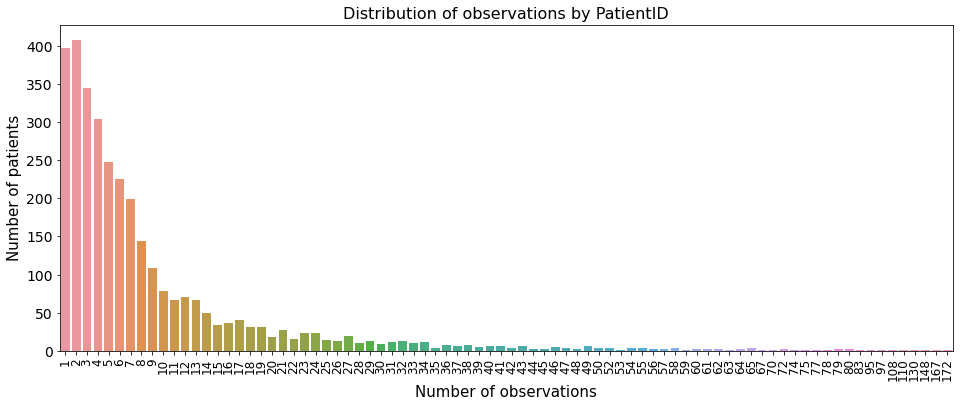

In [7]:
plt.figure(figsize=(16, 6))
df_tmp = df_train["PatientID"].value_counts()
sns.countplot(x=df_tmp.values)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Number of observations", fontsize=15)
plt.ylabel("Number of patients", fontsize=15)
plt.title("Distribution of observations by PatientID", fontsize=16);

<a id="2"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>Annotations<center><h2>

**train_annotations.csv** these are segmentation annotations for training samples that have them. They are included solely as additional information for competitors.

In [8]:
df_annot = pd.read_csv(os.path.join(BASE_DIR, "train_annotations.csv"))
df_annot.head()

StudyInstanceUID             label  \
0  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
1  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
2  1.2.826.0.1.3680043.8.498.72921907356394389969...  CVC - Borderline   
3  1.2.826.0.1.3680043.8.498.11697104485452001927...      CVC - Normal   
4  1.2.826.0.1.3680043.8.498.87704688663091069148...      NGT - Normal   

                                                data  
0  [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1  [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2  [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3  [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4  [[1862, 14], [1845, 293], [1801, 869], [1716, ...

In [9]:
def plot_image_with_annotations(row_ind):
    row = df_annot.iloc[row_ind]
    image_path = os.path.join(BASE_DIR, "train", row["StudyInstanceUID"] + ".jpg")
    label = row["label"]
    data = np.array(ast.literal_eval(row["data"]))
    
    plt.figure(figsize=(10, 5))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.scatter(data[:, 0], data[:, 1])
    
    plt.suptitle(label, fontsize=15)

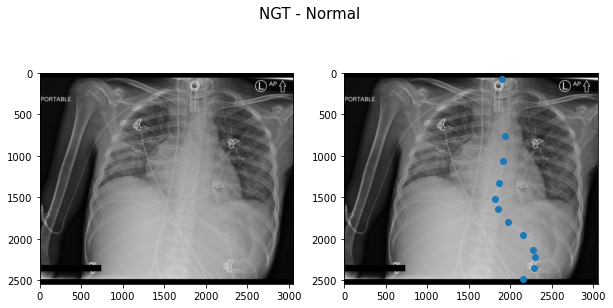

In [10]:
plot_image_with_annotations(8)

In [11]:
# from https://www.kaggle.com/c/ranzcr-clip-catheter-line-classification/discussion/203353#1117642

def visualize_annotations(file_id):
    plt.figure(figsize=(8, 8))
    
    image = cv2.imread(os.path.join(BASE_DIR, "train", file_id + ".jpg"))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    df_patient = df_annot.loc[df_annot["StudyInstanceUID"] == file_id]
    
    if df_patient.shape[0]:        
        labels = df_patient["label"].values.tolist()
        lines = df_patient["data"].apply(ast.literal_eval).values.tolist()

        for line, label in zip(lines, labels):         
            line = np.asarray(line)
            plt.scatter(line[:, 0], line[:, 1], s=40, label=label)
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 20})
        
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    
    plt.show()

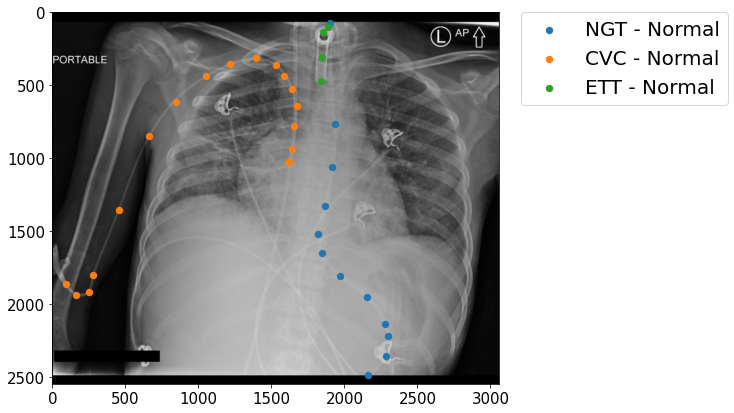

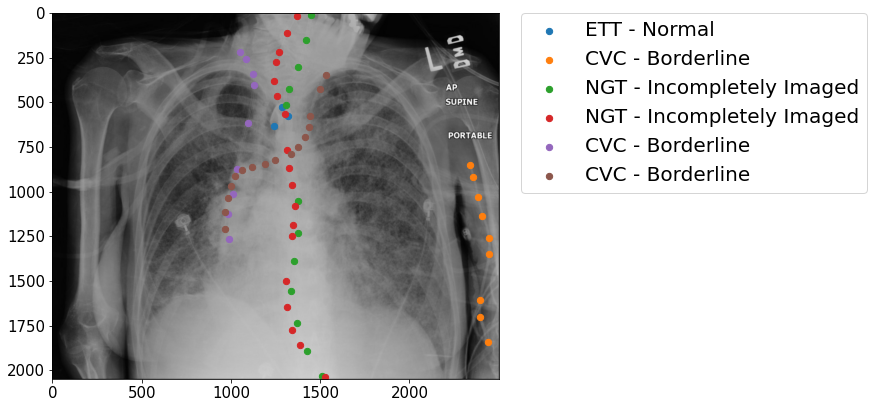

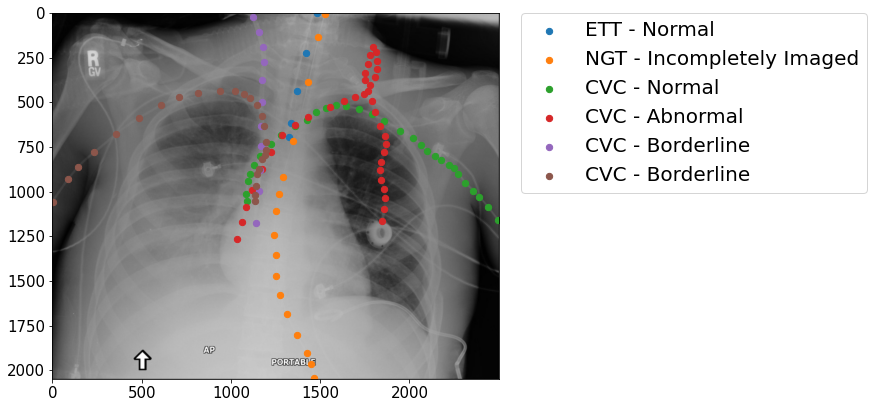

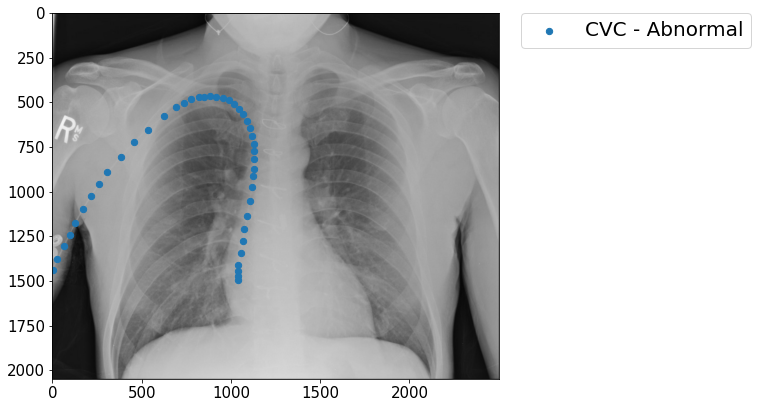

In [12]:
image_ids = [
    "1.2.826.0.1.3680043.8.498.83331936392921199432218327504041001669",
    "1.2.826.0.1.3680043.8.498.11693509889426445054876979814173446281",
    "1.2.826.0.1.3680043.8.498.15159015355212130418020059688126994534",
    "1.2.826.0.1.3680043.8.498.92067938763801985117661596637576203997",
]

for image_id in image_ids:
    visualize_annotations(image_id)

In [13]:
def visualize_batch(image_ids):
    plt.figure(figsize=(16, 10))
    
    for ind, image_id in enumerate(image_ids):
        plt.subplot(2, 3, ind + 1)
        image = cv2.imread(os.path.join(BASE_DIR, "train", f"{image_id}.jpg"))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.axis("off")
    
    plt.show()

    
def plot_statistics(df, col):
    plt.figure(figsize=(16, 2))
    sns.countplot(y=df[col])
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Number of observations", fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=16);
    
    plt.show()
#     
#     
#     
    

def process_class(col_name):
    plot_statistics(df_train, col_name)
    tmp_df = df_train[df_train[col_name] == 1]
    visualize_batch(random.sample(tmp_df.index.tolist(), 6))

<a id="4"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>ETT - Abnormal<center><h2>

endotracheal tube placement abnormal

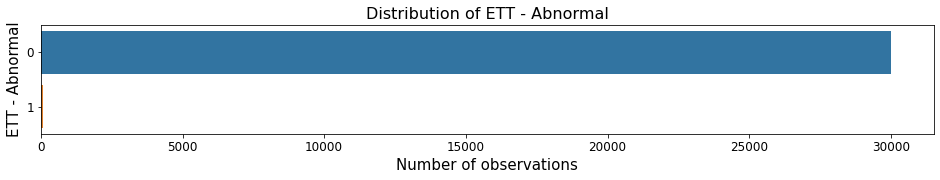

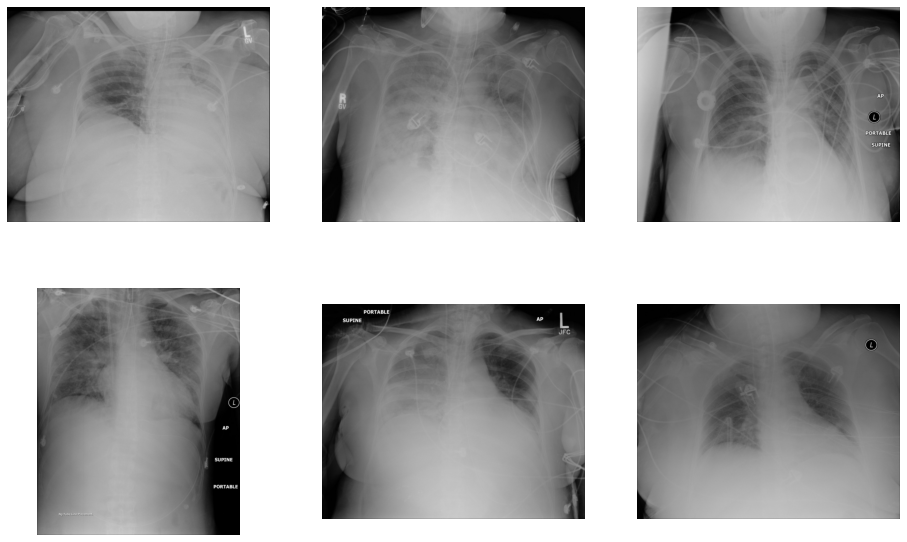

In [14]:
process_class("ETT - Abnormal")

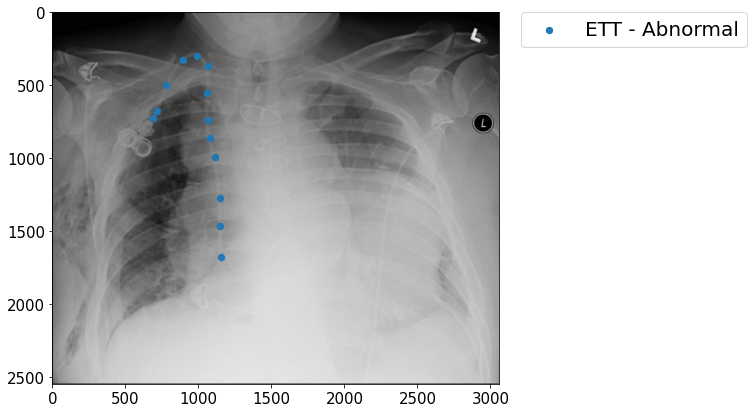

In [15]:
visualize_annotations("1.2.826.0.1.3680043.8.498.93345761486297843389996628528592497280")

<a id="5"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>ETT - Borderline<center><h2>

endotracheal tube placement borderline abnormal

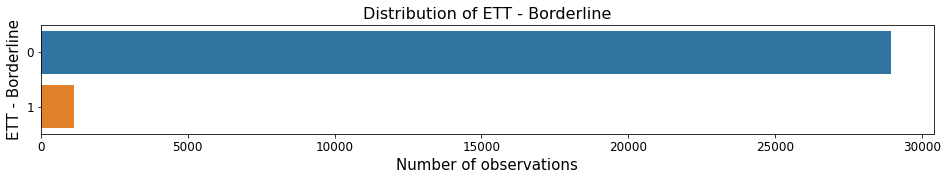

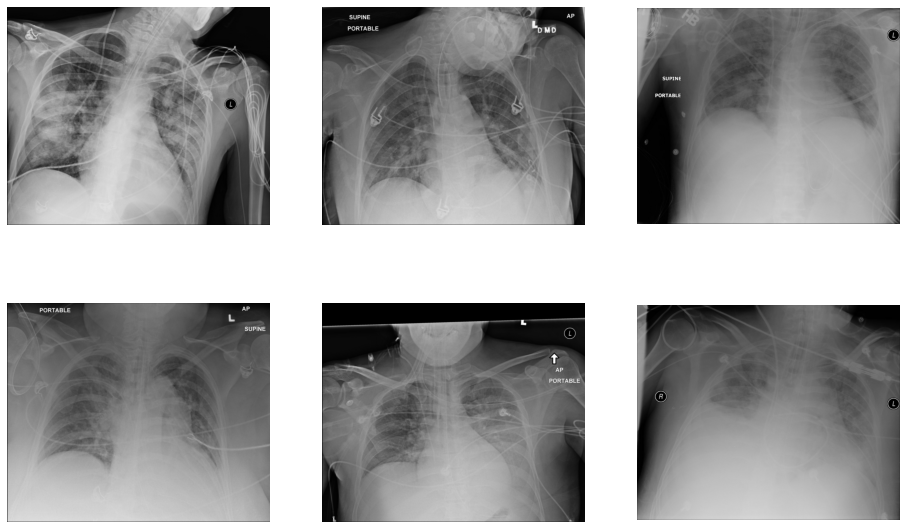

In [16]:
process_class("ETT - Borderline")

<a id="6"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>ETT - Normal<center><h2>

endotracheal tube placement normal

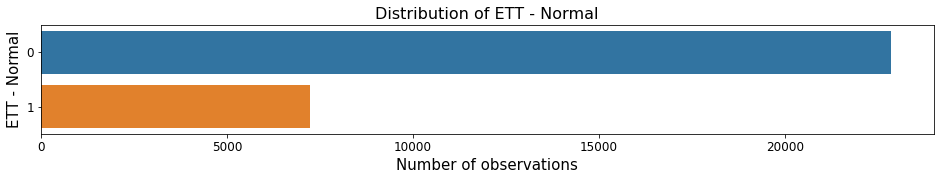

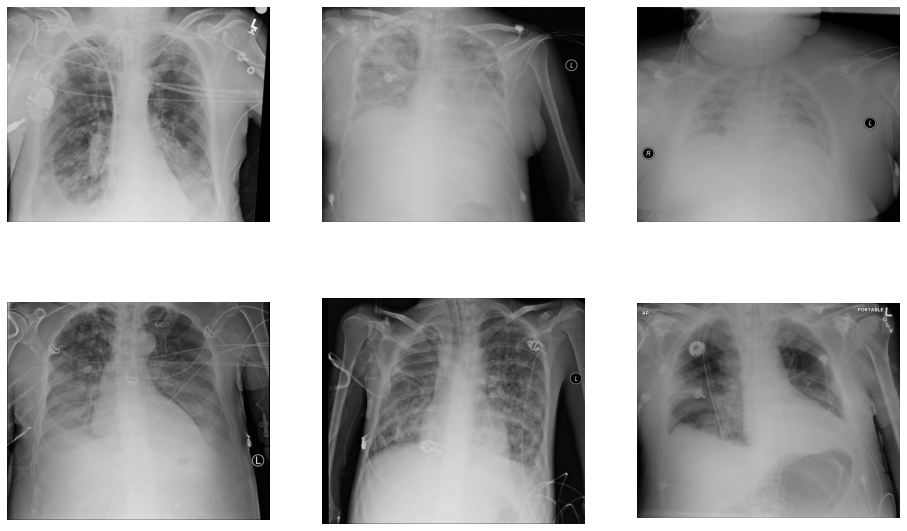

In [17]:
process_class("ETT - Normal")

<a id="7"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>NGT - Abnormal<center><h2>

nasogastric tube placement abnormal

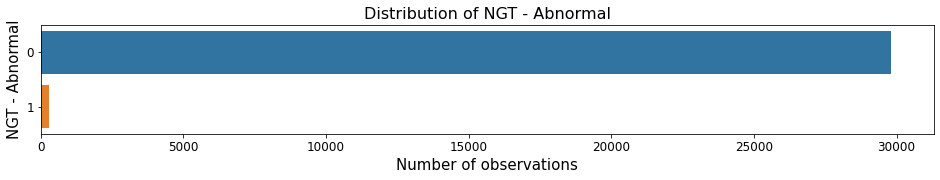

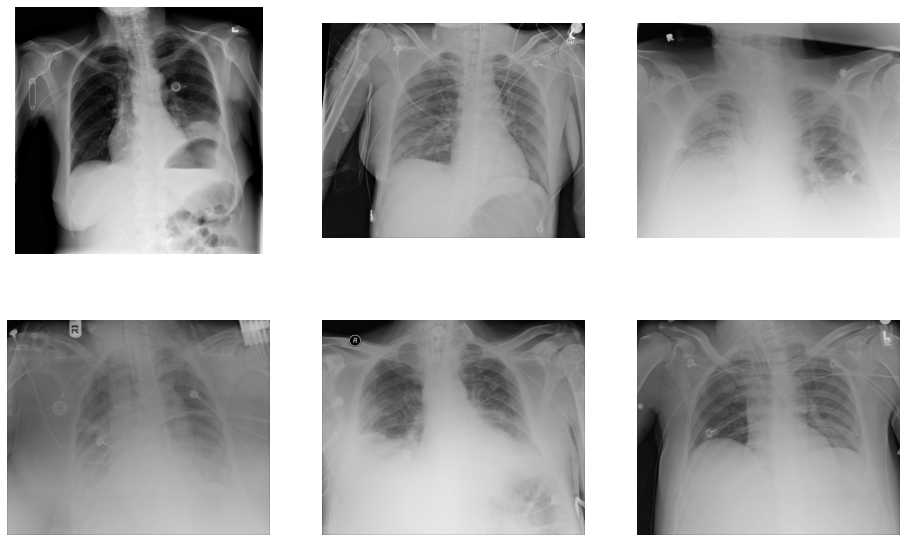

In [18]:
process_class("NGT - Abnormal")

<a id="8"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>NGT - Borderline<center><h2>

nasogastric tube placement borderline abnormal

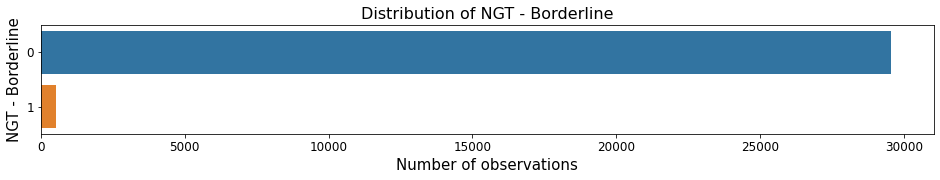

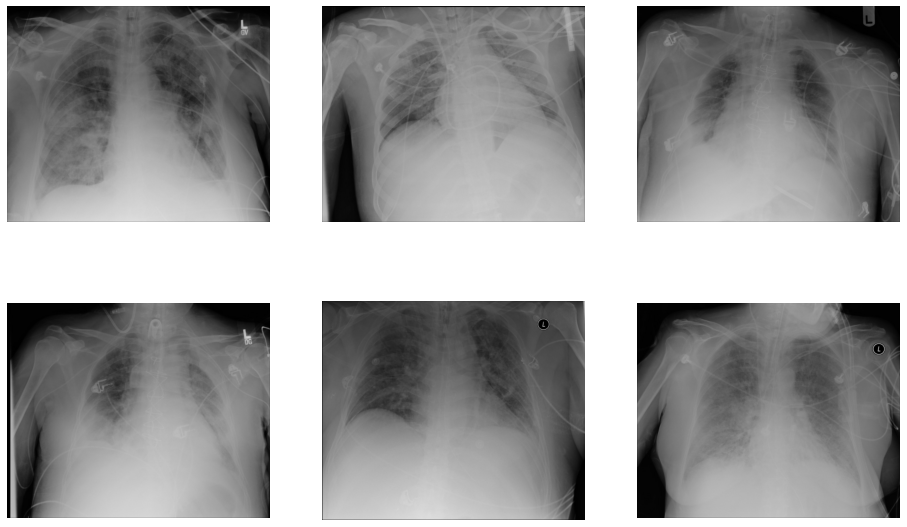

In [19]:
process_class("NGT - Borderline")

<a id="9"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>NGT - Incompletely Imaged<center><h2>

nasogastric tube placement inconclusive due to imaging

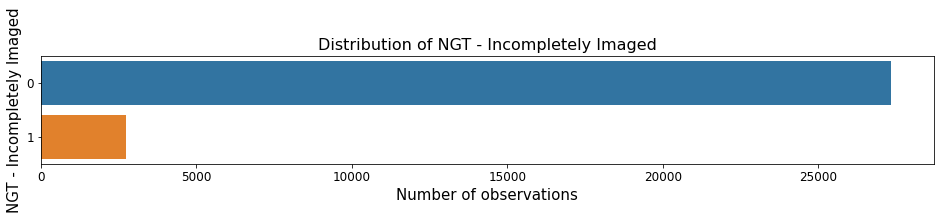

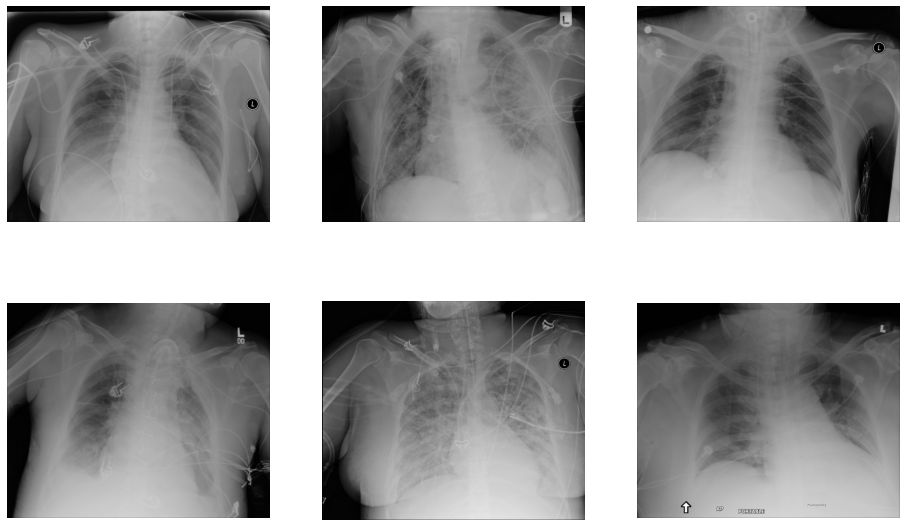

In [20]:
process_class("NGT - Incompletely Imaged")

<a id="10"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>NGT - Normal<center><h2>

nasogastric tube placement borderline normal

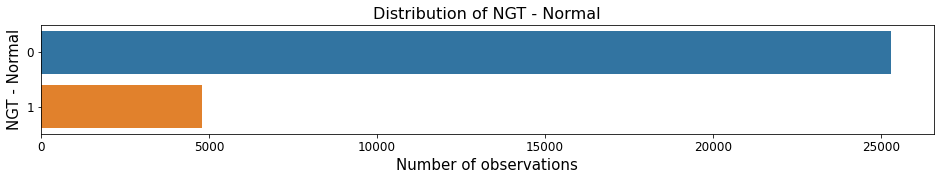

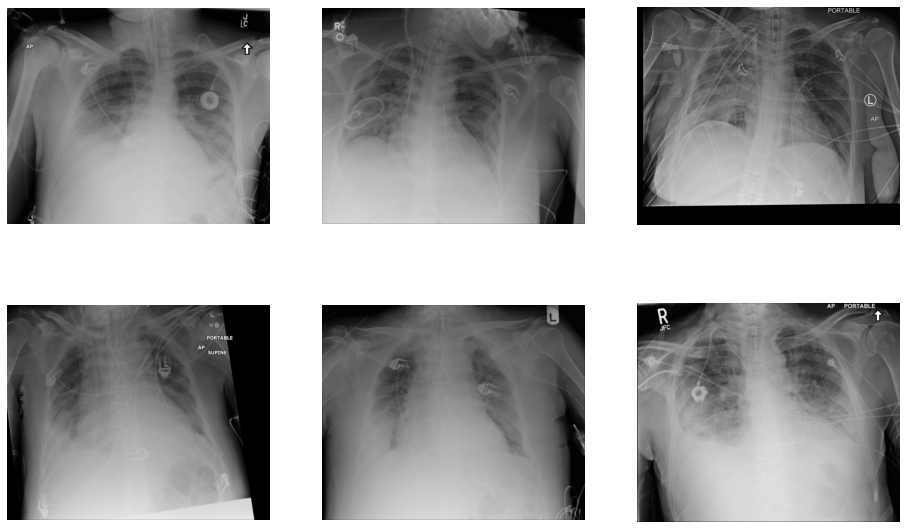

In [21]:
process_class("NGT - Normal")

<a id="11"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>CVC - Abnormal<center><h2>

central venous catheter placement abnormal

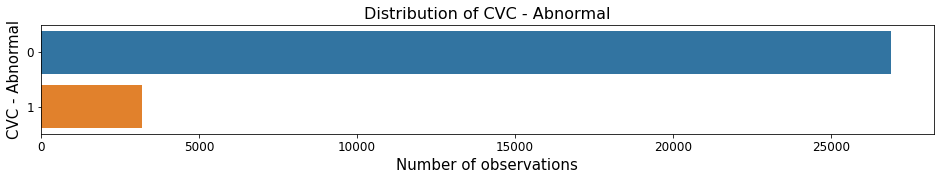

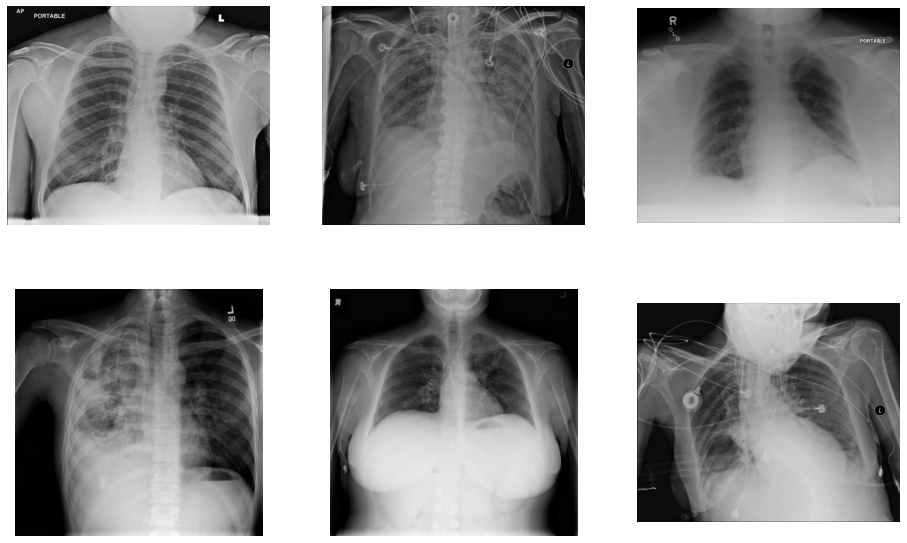

In [22]:
process_class("CVC - Abnormal")

<a id="12"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>CVC - Borderline<center><h2>

central venous catheter placement borderline abnormal

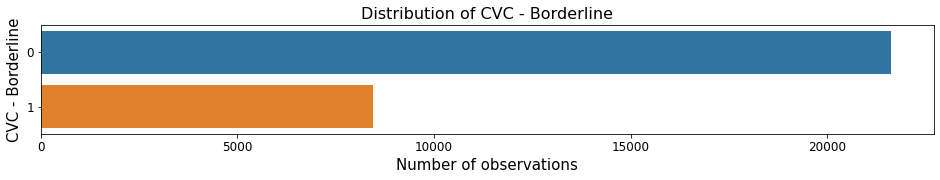

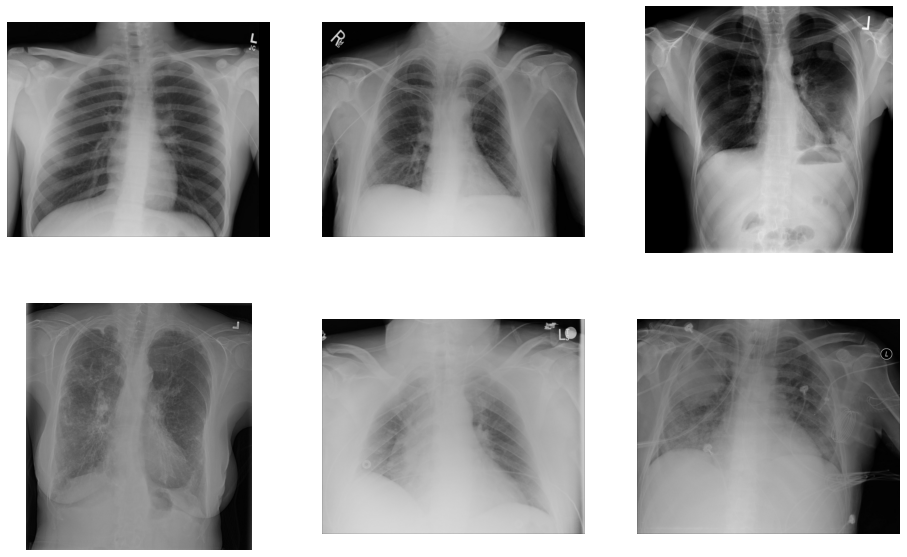

In [23]:
process_class("CVC - Borderline")

<a id="13"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>CVC - Normal<center><h2>

central venous catheter placement normal

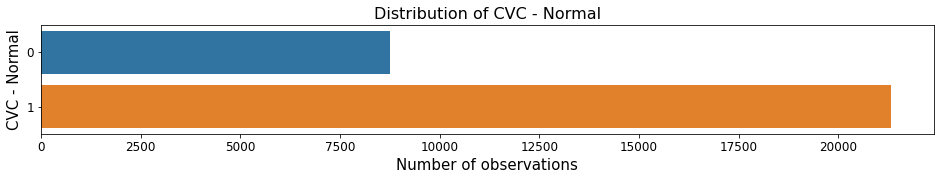

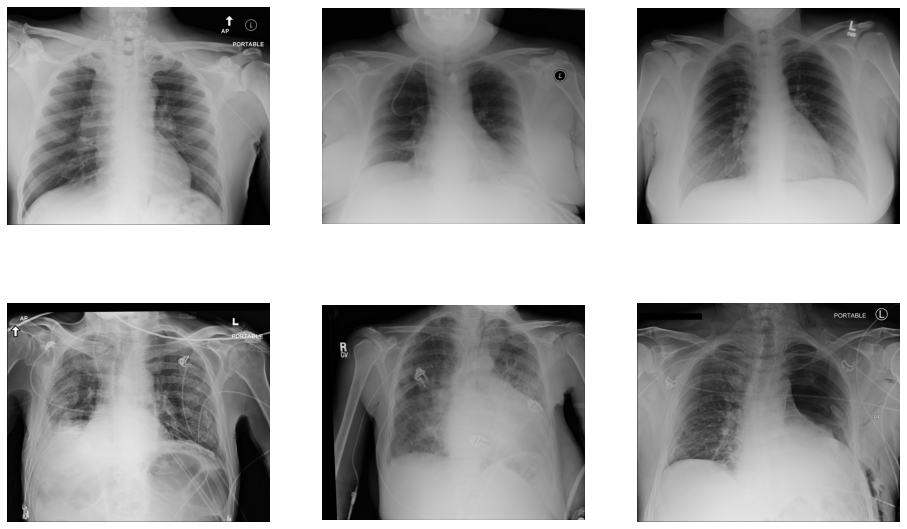

In [24]:
process_class("CVC - Normal")

<a id="14"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>Swan Ganz Catheter Present<center><h2>

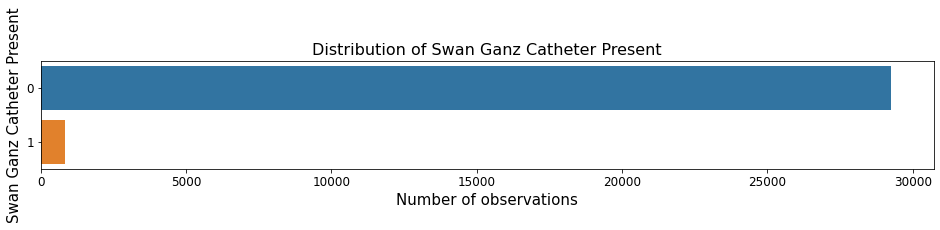

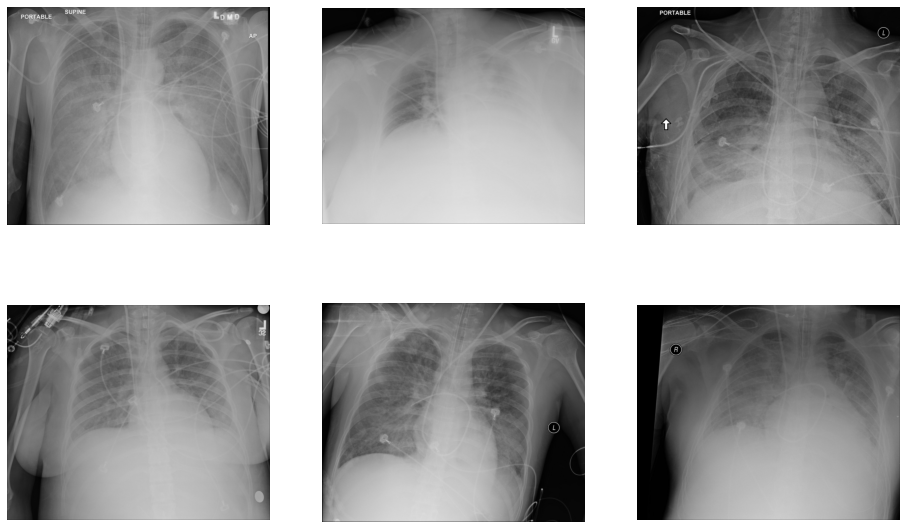

In [25]:
process_class("Swan Ganz Catheter Present")

<a id="50"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>Venn Diagrams<center><h2>

In [26]:
tmp_first = df_train["ETT - Abnormal"].sum()
tmp_second = df_train["NGT - Abnormal"].sum()
tmp_third = df_train[(df_train["ETT - Abnormal"] == 1) & (df_train["NGT - Abnormal"] == 1)].shape[0]

venn2(
    subsets = (tmp_first, tmp_second, tmp_third), 
    set_labels = ("ETT - Abnormal", "NGT - Abnormal"),
);

NameError: name 'venn2' is not defined

In [ ]:
tmp_first = df_train["ETT - Abnormal"].sum()
tmp_second = df_train["CVC - Abnormal"].sum()
tmp_third = df_train[(df_train["ETT - Abnormal"] == 1) & (df_train["CVC - Abnormal"] == 1)].shape[0]

venn2(
    subsets = (tmp_first, tmp_second, tmp_third), 
    set_labels = ("ETT - Abnormal", "CVC - Abnormal"),
);

In [ ]:
tmp_first = df_train["NGT - Abnormal"].sum()
tmp_second = df_train["CVC - Abnormal"].sum()
tmp_third = df_train[(df_train["NGT - Abnormal"] == 1) & (df_train["CVC - Abnormal"] == 1)].shape[0]

venn2(
    subsets = (tmp_first, tmp_second, tmp_third), 
    set_labels = ("NGT - Abnormal", "CVC - Abnormal"),
);

<a id="100"></a>
<h2 style='background:#6E848D; border:0; color:white'><center>Submission<center><h2>

**sample_submission.csv** - a sample submission file in the correct format

In [ ]:
df_submission = pd.read_csv(os.path.join(BASE_DIR, "sample_submission.csv"), index_col=0)
df_submission

In [ ]:
df_submission.to_csv("submission.csv")